Get distribution of dihedral angles between units 

In [2]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from streamm import values

# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [3]:
from dask import delayed


In [4]:
local = resource.Resource('local')
local.load_json()

peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


In [5]:
print local.dir['home']

/Users/tkemper/Projects/DApolymers


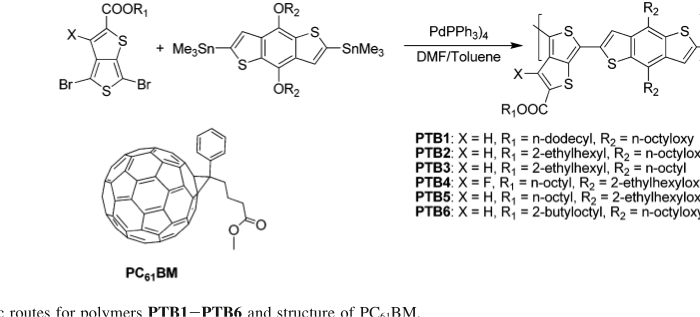

In [6]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [105]:
def np_L(np_AIJ,D):
        
    size = np_AIJ[0].size 
    if( D[0].size != size ):
        print "Size error "
        return
    
    L = np.zeros((size,size),dtype=np.float64)
    
    for i in range(size):
        for j in range(size):
            L[i,j] = D[i,j] - np_AIJ[i,j] 

    return L

def np_sum_Vij(np_AIJ):
        
    size = np_AIJ[0].size 
    
    D = np.zeros((size,size),dtype=np.float64)
    
    for i in range(size):
        Dij = 0.0
        for j in range(size):
            Dij += np_AIJ[i,j]

        D[i,i] = Dij
                 
    return D

def np_Omega(Lplus):
        
    size = Lplus[0].size 
    
    Omega = np.zeros((size,size),dtype=np.float64)
    
    for i in range(size):
        for j in range(size):
            Omega[i,j] = Lplus[i,i]  + Lplus[j,j]  - Lplus[i,j]  - Lplus[j,i]  

    return Omega

def np_Alpha(Omega):

    size = Omega[0].size 
    
    Alpha = np.zeros((size,size),dtype=np.float64)
    
    for i in range(size):
        for j in range(size):
            if( i != j ):
                Alpha[i,j] = 1.0/Omega[i,j] 

    return Alpha    

def np_KT(Alpha):
    n_sqr = Alpha[0].size*Alpha[0].size 
    return  Alpha.sum()/n_sqr

In [139]:
def calc_KT(np_AIJ):
    '''
    Okay let's calculated the Kurchoff transport coefficient $K_{T}$ 

    For a network of n vertices

    The Laplacian matrix L is nxn

    $L = D - A$

    Where $A$ is the adjacency matrix and $D$ is the degree matrix 

    $ A_{ij} = |H_{ij}| $

    $ D_{ii} = \sum_{j} A_{ij} $ 


    Moore-Penrose Inverse $L^{+}$

    $\Omega_{ij} = L_{ii}^{+} + L_{jj}^{+} - L_{ij}^{+} -  L_{ji}^{+}$

    $\Alpha  = 1/\Omega_{ij} $

    $K_{T} = \frac{1}{n^2} \sum_{i,j} \Alpha_{ij}$    
    '''

    # Calculate $D_{ii}$ which is just the sum of each site with respect to all the other sites. 

    D = np_sum_Vij(np_AIJ)
    # $L = D - S$

    L = np_L(np_AIJ,D)    

    # Form the generalized Moore-Penrose inverse of the laplacian, ldagger
    Lplus = np.linalg.pinv(L)

    Omega = np_Omega(Lplus)

    Alpha = np_Alpha(Omega)
    
    KT = np_KT(Alpha)
    
    del D,L,Lplus,Omega,Alpha
    
    return KT

In [7]:
os.getcwd()

'/Users/tkemper/Projects/DApolymers/notebooks'

In [8]:
proj_ref = 'res_et2'
proj_ref = project.Project('DAPpolymers_%s'%(proj_ref))
proj_ref.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [9]:
for tag_i,calc_r in proj_ref.calculations.iteritems():
    print calc_r.tag
    print calc_r.properties['name']
    os.chdir(calc_r.dir['materials'])     
    calc_r.files['output']['unit_ij'] = "%s.csv"%(tag_i)
    calc_r.files['output']['mol_ij'] = "%s_mol.csv"%(tag_i)

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3
PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB7
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2
PCE10


In [10]:
proj_suf = "_unitKTv2"
proj_i = project.Project("DAPpolymers%s"%(proj_suf))
proj_i.load_json()

No handlers could be found for logger "streamm.project"


In [11]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [12]:
for tag_i,calc_i in proj_ref.calculations.iteritems():
    print calc_i.meta['use']

False
False
True
False
True
True
True
True
True
False


In [13]:
tag_rl = []
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_ref.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print calc_i.tag
    tag_rl.append(calc_i.tag)
    

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4


In [14]:
tag_l = []
for tag_i in tag_rl:
    calc_r = proj_ref.calculations[tag_i]
    calc_i = copy.deepcopy(calc_r)
    calc_i.tag = calc_i.tag + proj_suf
    print calc_i.properties['name'],calc_i.tag 
    proj_i.calculations[calc_i.tag ] = calc_i 
    tag_l.append(calc_i.tag)

BDT-TPD D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB1 D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB5 D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB4 D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PTB7 D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PCE10 D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2


In [15]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    print calc_i.properties['name'],calc_i.dir['materials']
    os.chdir(calc_i.dir['materials'])     
    calc_i.files['output']['dih_CCCC'] = "dih_CCCC.csv"
    calc_i.dih_ij = pd.read_csv(calc_i.files['output']['dih_CCCC'])
    

BDT-TPD /Users/tkemper/Projects/DApolymers/materials/BDT-TPD
PTB1 /Users/tkemper/Projects/DApolymers/materials/PTB1
PTB5 /Users/tkemper/Projects/DApolymers/materials/PTB5
PTB4 /Users/tkemper/Projects/DApolymers/materials/PTB4
PTB7 /Users/tkemper/Projects/DApolymers/materials/PTB7
PCE10 /Users/tkemper/Projects/DApolymers/materials/PCE10


In [16]:
    calc_i.dih_ij.columns

Index([u'Unnamed: 0', u'dkey', u'pkey_k', u'pkey_i', u'pkey_j', u'pkey_l',
       u'mol_i', u'g_i', u'g_j', u'cosine'],
      dtype='object')

In [17]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    print 'proj_i.calculations[\''+tag_i+'\'].properties[\'Jocos\'] = '

proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['Jocos'] = 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['Jocos'] = 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2'].properties['Jocos'] = 


In [18]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 0.101
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 0.154
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['Jocos'] = 0.154
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['Jocos'] = 0.222
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['Jocos'] = 0.222
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2'].properties['Jocos'] = 0.194

In [19]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    print 'proj_i.calculations[\''+tag_i+'\'].properties[\'theta_n1\'] = '

proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n1'] = 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n1'] = 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2'].properties['theta_n1'] = 


In [21]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n2'] = -9.0
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n2'] =  -165.6
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n2'] = -165.6
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n2'] = -20.3
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n2'] = -20.3
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2'].properties['theta_n2'] = -163.2

In [22]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = -177.7
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = 155.9
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2'].properties['theta_n1'] = 155.9
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n1'] = 27.2
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2'].properties['theta_n1'] = 27.2
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2'].properties['theta_n1'] = 153.1

In [24]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    t_rad = np.deg2rad(float(calc_i.properties['theta_n2']))
    cos_i = abs(np.cos(t_rad))
    calc_i.properties['Jo'] = round(calc_i.properties['Jocos']/cos_i,2)
    
    print calc_i.properties['Jocos'],calc_i.properties['theta_n2'],cos_i,calc_i.properties['Jo']

0.101 -9.0 0.987688340595 0.1
0.154 -165.6 0.968583161129 0.16
0.154 -165.6 0.968583161129 0.16
0.222 -20.3 0.937888934612 0.24
0.222 -20.3 0.937888934612 0.24
0.194 -163.2 0.957319497532 0.2


In [32]:
    print calc_i.dih_ij.columns

Index([u'Unnamed: 0', u'dkey', u'pkey_k', u'pkey_i', u'pkey_j', u'pkey_l',
       u'mol_i', u'g_i', u'g_j', u'cosine'],
      dtype='object')


In [52]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.properties['Jconst'] = 0.1

In [53]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    Jo = calc_i.properties['Jo']
    Jconst = calc_i.properties['Jconst']

    print calc_i.properties['name'], Jo
    calc_i.dih_ij['Jocos'] = calc_i.dih_ij['cosine'].apply(lambda x: abs(x)*Jo)
    calc_i.dih_ij['Jconstcos'] = calc_i.dih_ij['cosine'].apply(lambda x: abs(x)*Jconst)


    

BDT-TPD 0.1
PTB1 0.16
PTB5 0.16
PTB4 0.24
PTB7 0.24
PCE10 0.2


In [41]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures/')

BDT-TPD
BDT-TPD 0.0889078343509
PTB1
PTB1 0.141010781614
PTB5
PTB5 0.133602647527
PTB4
PTB4 0.192339902593
PTB7
PTB7 0.200326403378
PCE10
PCE10 0.15689018765


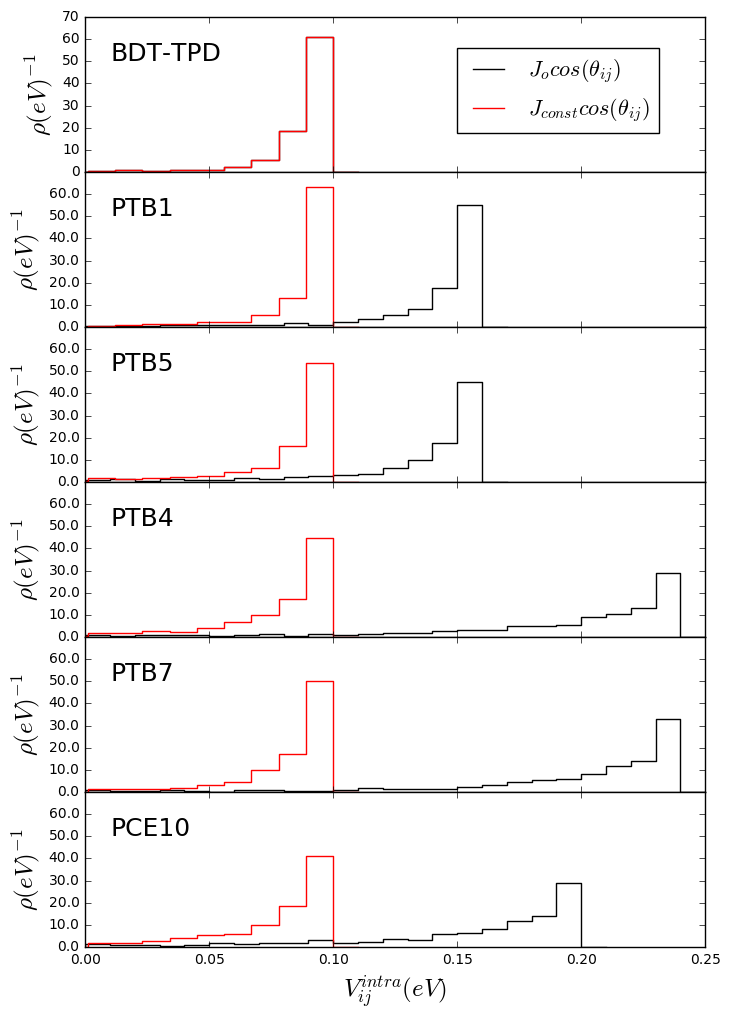

In [63]:
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 16
fontsz_text = 18

fig, ax = plt.subplots(6,sharex=True)

i = 0 
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    print calc_i.properties['name']
    Polymer = calc_i.properties['name']
    mean = calc_i.dih_ij['Jocos'].mean()
    # 
    print Polymer,mean
    # mol_SIJ['SIJ_max'].hist(ax=ax[i], bins=50, bottom=0.1)
    # ax.set_yscale('log')    


    val_i = values.Values('Jocos',calc_i.dih_ij['Jocos'].values)
    #val_i = values.Values('cosine',dih_df['cosine'].apply(lambda x: np.rad2deg(np.arccos(abs(x)))))
    val_i.calc_stats()
    val_i.set_bins(.01)
    val_i.calc_hist()
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label=r'$J_{o}cos(\theta_{ij})$')
    

    val_i = values.Values('cosine',calc_i.dih_ij['Jconstcos'].values)
    #val_i = values.Values('cosine',dih_df['cosine'].apply(lambda x: np.rad2deg(np.arccos(abs(x)))))
    val_i.calc_stats()
    val_i.set_bins(.01)
    val_i.calc_hist()
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'r-.',ls = "steps",label=r'$J_{const}cos(\theta_{ij})$')
    


    ax[i].set_xlim(0,0.25)
    ax[i].set_ylim(0.0,70.0)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,6.0)
    ax[i].text(0.01,50.0,Polymer,fontsize=fontsz_text)

    if( i > 0 ):
        labels=ax[i].get_yticks().tolist()
        labels[-1]=''
        ax[i].set_yticklabels(labels)    


    ax[i].set_ylabel(r'$\rho (eV)^{-1}$',fontsize=fontsz_text)
    i += 1

ax[0].legend(loc=(0.6,0.250),prop={'size':fontsz_leg})


fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)
ax[i-1].set_xlabel(r'$V_{ij}^{intra} (eV)$',fontsize=fontsz_text)


fig.savefig('Jocos_v1.pdf',format='pdf')

In [64]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

In [37]:
table_lines = 'Polymer & $J_{o}cos(\theta)$ (eV) & $\theta$ (deg) & $J_{o}$ (eV) \\\\ \hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    table_lines += '%s  '%(calc_i.properties['name'])
    t_abs = abs(calc_i.properties['theta_n2'])
    if( t_abs > 90.0 ):
        t_abs = 180.0 - t_abs
    table_lines += '& %8.3f & %8.2f & %8.2f '%(calc_i.properties['Jocos'],t_abs,calc_i.properties['Jo'])
    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

print table_lines
f = open('Jcos_v2.tex','w')
f.write(table_lines)
f.close()

Polymer & $J_{o}cos(	heta)$ (eV) & $	heta$ (deg) & $J_{o}$ (eV) \\ \hline 
BDT-TPD  &    0.101 &     9.00 &     0.10  \\ 
PTB1  &    0.154 &    14.40 &     0.16  \\ 
PTB5  &    0.154 &    14.40 &     0.16  \\ 
PTB4  &    0.222 &    20.30 &     0.24  \\ 
PTB7  &    0.222 &    20.30 &     0.24  \\ 
PCE10  &    0.194 &    16.80 &     0.20  \\ 



In [75]:
t_name = 'Jcos_v3.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines += 'Polymer & $J_{o}$ (eV) & $<J_{o}cos(\\theta_{ij})>$ ($\sigma$) (eV) & $<J_{const}cos(\\theta_{ij})>$ ($\sigma$) (eV) \\\\ \\hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.3f '%(calc_i.properties['Jo'])
    table_lines += '& %8.3f (%8.3f) '%(calc_i.dih_ij['Jocos'].mean(),calc_i.dih_ij['Jocos'].std())
    table_lines += '& %8.3f (%8.3f) '%(calc_i.dih_ij['Jconstcos'].mean(),calc_i.dih_ij['Jconstcos'].std())
    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()

\begin{tabular}{|c|c|c|c|} 
\hline 
Polymer & $J_{o}$ (eV) & $<J_{o}cos(\theta_{ij})>$ ($\sigma$) (eV) & $<J_{const}cos(\theta_{ij})>$ ($\sigma$) (eV) \\ \hline 
BDT-TPD  &    0.100 &    0.089 (   0.015) &    0.089 (   0.015)  \\ 
PTB1  &    0.160 &    0.141 (   0.028) &    0.088 (   0.018)  \\ 
PTB5  &    0.160 &    0.134 (   0.035) &    0.084 (   0.022)  \\ 
PTB4  &    0.240 &    0.192 (   0.054) &    0.080 (   0.023)  \\ 
PTB7  &    0.240 &    0.200 (   0.049) &    0.083 (   0.020)  \\ 
PCE10  &    0.200 &    0.157 (   0.047) &    0.078 (   0.023)  \\ 
\hline 
\end{tabular}


In [80]:
    print dih_ij.columns

Index([u'Unnamed: 0', u'dkey', u'pkey_k', u'pkey_i', u'pkey_j', u'pkey_l',
       u'mol_i', u'g_i', u'g_j', u'cosine', u'Jocos', u'Jconstcos'],
      dtype='object')


In [131]:
def np_dih_moldf_Jc(dih_ij):
    
    mol_o = dih_ij['mol_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    mol_n = dih_ij['mol_i'].max() 
    
    mol_As = {}
    for mol_i in range(mol_o,mol_n+1):
        dih_mol_i = dih_ij[ ( dih_ij['mol_i'] == mol_i ) ]

        g_o = dih_mol_i['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
        g_n = dih_mol_i['g_j'].max() 

        size = g_n - g_o + 1

        np_AIJ = np.zeros((size,size),dtype=np.float64)
        for g_i in range(g_o,g_n+1):
            i = g_i - g_o
            dih_i = dih_mol_i[ ( dih_mol_i['g_i'] == g_i ) ]
            g_j_l = dih_i['g_j'].values
            for g_j in g_j_l:
                j = g_j - g_o
                Jocos =  dih_ij[ (dih_ij['g_i'] == g_i ) & (dih_ij['g_j'] == g_j ) ]['Jconstcos'].values
                if( len(Jocos) > 1 ):
                    print 'table error %d %d returned list '%(g_i,g_j)
                    print cos_ij 
                np_AIJ[i,j] =  Jocos[0]
                np_AIJ[j,i] =  Jocos[0]
                
        mol_As[mol_i] = np_AIJ
 
    return mol_As   

In [132]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    dih_ij = calc_i.dih_ij
    calc_i.Vijintra_Jconstcos = np_dih_moldf_Jc(dih_ij)

In [103]:
def np_dih_moldf(dih_ij):
    
    mol_o = dih_ij['mol_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    mol_n = dih_ij['mol_i'].max() 
    
    mol_As = {}
    for mol_i in range(mol_o,mol_n+1):
        dih_mol_i = dih_ij[ ( dih_ij['mol_i'] == mol_i ) ]

        g_o = dih_mol_i['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
        g_n = dih_mol_i['g_j'].max() 


        size = g_n - g_o + 1
        print " - g ",g_o,g_n,size


        np_AIJ = np.zeros((size,size),dtype=np.float64)
        for g_i in range(g_o,g_n+1):
            i = g_i - g_o
            dih_i = dih_mol_i[ ( dih_mol_i['g_i'] == g_i ) ]
            g_j_l = dih_i['g_j'].values
            for g_j in g_j_l:
                j = g_j - g_o
                Jocos =  dih_ij[ (dih_ij['g_i'] == g_i ) & (dih_ij['g_j'] == g_j ) ]['Jocos'].values
                if( len(Jocos) > 1 ):
                    print 'table error %d %d returned list '%(g_i,g_j)
                    print cos_ij 
                np_AIJ[i,j] =  Jocos[0]
                np_AIJ[j,i] =  Jocos[0]
                
        mol_As[mol_i] = np_AIJ
 
    return mol_As   

In [104]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    dih_ij = calc_i.dih_ij
    calc_i.Vijintra_Jocos = np_dih_moldf(dih_ij)



 - g  0 9 10
 - g  10 19 10
 - g  20 29 10
 - g  30 39 10
 - g  40 49 10
 - g  50 59 10
 - g  60 69 10
 - g  70 79 10
 - g  80 89 10
 - g  90 99 10
 - g  100 109 10
 - g  110 119 10
 - g  120 129 10
 - g  130 139 10
 - g  140 149 10
 - g  150 159 10
 - g  160 169 10
 - g  170 179 10
 - g  180 189 10
 - g  190 199 10
 - g  200 209 10
 - g  210 219 10
 - g  220 229 10
 - g  230 239 10
 - g  240 249 10
 - g  250 259 10
 - g  260 269 10
 - g  270 279 10
 - g  280 289 10
 - g  290 299 10
 - g  300 309 10
 - g  310 319 10
 - g  320 329 10
 - g  330 339 10
 - g  340 349 10
 - g  350 359 10
 - g  360 369 10
 - g  370 379 10
 - g  380 389 10
 - g  390 399 10
 - g  400 409 10
 - g  410 419 10
 - g  420 429 10
 - g  430 439 10
 - g  440 449 10
 - g  450 459 10
 - g  460 469 10
 - g  470 479 10
 - g  480 489 10
 - g  490 499 10
 - g  500 509 10
 - g  510 519 10
 - g  520 529 10
 - g  530 539 10
 - g  540 549 10
 - g  550 559 10
 - g  560 569 10
 - g  570 579 10
 - g  580 589 10
 - g  590 599 10
 -

In [138]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    dih_ij = calc_i.dih_ij
    
    mol_o = dih_ij['mol_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    mol_n = dih_ij['mol_i'].max() 
    
    print mol_o,mol_n
    
    mol_KT = {}
    mol_KT['mol_i']  = []
    mol_KT['Jocos']  = []
    mol_KT['Jconstcos']  = []


    for mol_i in range(mol_o,mol_n+1):

        mol_KT['mol_i'].append(mol_i)
        mol_KT['Jocos'].append(calc_KT(calc_i.Vijintra_Jocos[mol_i]))
        mol_KT['Jconstcos'].append(calc_KT(calc_i.Vijintra_Jconstcos[mol_i]))
        
    calc_i.mol_KT = pd.DataFrame(mol_KT)
    

1 197
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

In [140]:
    print calc_i.mol_KT

     Jconstcos     Jocos  mol_i
0     0.028652  0.057304      0
1     0.029777  0.059554      1
2     0.020937  0.041875      2
3     0.031561  0.063123      3
4     0.034778  0.069557      4
5     0.031650  0.063300      5
6     0.031672  0.063344      6
7     0.029444  0.058887      7
8     0.019939  0.039878      8
9     0.028341  0.056682      9
10    0.025565  0.051129     10
11    0.033762  0.067524     11
12    0.029035  0.058071     12
13    0.027935  0.055870     13
14    0.032762  0.065523     14
15    0.030293  0.060586     15
16    0.026781  0.053563     16
17    0.030637  0.061274     17
18    0.032631  0.065262     18
19    0.032600  0.065200     19
20    0.027896  0.055793     20
21    0.029875  0.059750     21
22    0.026217  0.052434     22
23    0.030200  0.060400     23
24    0.028769  0.057538     24
25    0.019166  0.038333     25
26    0.028621  0.057241     26
27    0.033509  0.067018     27
28    0.027953  0.055906     28
29    0.034355  0.068709     29
..      

In [141]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    print calc_i.mol_KT['Jocos'].mean(),calc_i.mol_KT['Jocos'].std()

0.033619657992 0.00288225327702
0.0530172050007 0.00512452617321
0.0494287914732 0.00669108709671
0.070971685549 0.00982710180848
0.0742563181319 0.0091843887953
0.0575498316751 0.00867007690211


In [196]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
t_name = 'JcosKT_v2.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines += 'Polymer &  $K_{T}(J_{o}$)  ($\sigma$) eV  & $K_{T}(J_{const}$)  ($\sigma$) eV    \\\\ \\hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.3f (%8.3e) '%(calc_i.mol_KT['Jocos'].mean(),calc_i.mol_KT['Jocos'].std())
    table_lines += '& %8.3f (%8.3e) '%(calc_i.mol_KT['Jconstcos'].mean(),calc_i.mol_KT['Jconstcos'].std())

    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()

\begin{tabular}{|c|c|c|c|} 
\hline 
Polymer &  $K_{T}(J_{o}$)  ($\sigma$) eV  & $K_{T}(J_{const}$)  ($\sigma$) eV    \\ \hline 
BDT-TPD  &    0.034 (2.882e-03) &    0.034 (2.882e-03)  \\ 
PTB1  &    0.053 (5.125e-03) &    0.033 (3.203e-03)  \\ 
PTB5  &    0.049 (6.691e-03) &    0.031 (4.182e-03)  \\ 
PTB4  &    0.071 (9.827e-03) &    0.030 (4.095e-03)  \\ 
PTB7  &    0.074 (9.184e-03) &    0.031 (3.827e-03)  \\ 
PCE10  &    0.058 (8.670e-03) &    0.029 (4.335e-03)  \\ 
\hline 
\end{tabular}


In [151]:
def np_dihdf(dih_ij,key):
    
    g_o = dih_ij['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    g_n = dih_ij['g_j'].max() 
    
    size = g_n - g_o + 1
    
    print g_o,g_n,size

    np_AIJ = np.zeros((size,size),dtype=np.float64)
    for g_i in range(g_o,g_n+1):
        dih_i = dih_ij[ ( dih_ij['g_i'] == g_i ) ]
        g_j_l = dih_i['g_j'].values
        
        for g_j in g_j_l:
            Jocos =  dih_i[ (dih_i['g_j'] == g_j ) ][key].values
            if( len(Jocos) > 1 ):
                print 'table error %d %d returned list '%(g_i,g_j)
                print Jocos 
            np_AIJ[g_i,g_j] =  Jocos[0]
            np_AIJ[g_j,g_i] =  Jocos[0]


    return np_AIJ   

In [152]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    dih_ij = calc_i.dih_ij
    calc_i.np_Jocos = np_dihdf(dih_ij,'Jocos')

0 1969 1970
0 1729 1730
0 1929 1930
0 1929 1930
0 1929 1930
0 1729 1730


In [153]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    dih_ij = calc_i.dih_ij
    calc_i.np_Jconstcos = np_dihdf(dih_ij,'Jconstcos')

0 1969 1970
0 1729 1730
0 1929 1930
0 1929 1930
0 1929 1930
0 1729 1730


In [155]:
    #for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.properties['KT_Jocos'] = calc_KT(calc_i.np_Jocos)
    calc_i.properties['KT_Jconstcos'] = calc_KT(calc_i.np_Jconstcos)



    print calc_i.properties['KT_Jocos'],calc_i.properties['KT_Jconstcos']

0.0426478698576 0.026654918661


In [ ]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    os.chdir(calc_i.dir['materials'])     
    np.save('Jocos.npy', calc_i.np_Jocos) 

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

In [156]:
#table_lines = 'Polymer & $K_{T}$ (eV) & $K_{T}/<S_{IJ}>$ (eV)  \\\\ \hline \n'
table_lines = 'Polymer & $K_{T}(Jocos)$ (eV)   \\\\ \hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]



    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.2e '%(calc_i.properties['KT_Jocos'] ) 
    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

print table_lines
f = open('unitKT_Jcos_v3.tex','w')
f.write(table_lines)
f.close()

KeyError: 'KT_Jocos'

In [ ]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    os.chdir(calc_i.dir['materials'])     
    np.save('Jocos.npy', calc_i.np_Jocos) 

Calculate Vij using Sij and E_I and E_J

In [157]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.tag
    print calc_i.properties['name']
    os.chdir(calc_i.dir['materials'])     
    calc_i.unit_ij = pd.read_csv(calc_i.files['output']['unit_ij'])
    calc_i.mol_ij = pd.read_csv(calc_i.files['output']['mol_ij'])    

D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB1
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2
PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2
BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB5


In [158]:
def calc_VijIJ(row_i):
    gamma = 1.168
    e_bar = -0.5*(row_i['HOMO_I'] + row_i['HOMO_J'])
    return gamma*abs(row_i['Sij'])*e_bar

In [159]:
    print calc_i.mol_ij.columns

Index([u'Unnamed: 0', u'SIJ_AA_N', u'SIJ_DA_N', u'SIJ_DD_N', u'SIJ_N',
       u'mol_i', u'mol_j', u'tag_x', u'g_i', u'total_i', u'HOMO_i', u'LUMO_i',
       u'tag_y', u'g_j', u'total_j', u'HOMO_j', u'LUMO_j', u'VIJ', u'VIJ_DA',
       u'VIJ_DD', u'VIJ_AA'],
      dtype='object')


In [160]:
    print calc_i.unit_ij.columns

Index([u'Unnamed: 0', u'E_prod', u'E_reac', u'HOMO_i', u'HOMO_j', u'LUMO_i',
       u'LUMO_j', u'Sij', u'Vij', u'dcm_ij', u'dr_pi_pj', u'g_i', u'g_j',
       u'mol_i', u'mol_j', u'resname_i', u'resname_j', u'tag', u'total_i',
       u'total_j'],
      dtype='object')


In [161]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    g_o = calc_i.unit_ij['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    g_n = calc_i.unit_ij['g_j'].max()     
    size = g_n - g_o + 1
    g_o = calc_i.mol_ij['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    g_n = calc_i.mol_ij['g_j'].max()     
    size_m = g_n - g_o + 1


    print tag_i
    print calc_i.np_Jocos.shape ,size,size_m


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1970, 1970) 1970 197
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1730, 1730) 1730 173
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1930, 1930) 1930 193
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
(1930, 1930) 1930 193
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
(1930, 1930) 1930 193
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2
(1730, 1730) 1730 173


In [ ]:
   # t1_m = homo_IJ[ ((homo_IJ['mol_i'] == 0 ) |  (homo_IJ['mol_i'] == 1 )) & ((homo_IJ['mol_j'] == 4 ) |  (homo_IJ['mol_j'] == 13))]

Fix BDT-TPD with mol 1 -N instead of 0- (N-1)

In [162]:
    calc_i = proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2']

    calc_i.unit_ij['mol_i'] =  calc_i.unit_ij['mol_i'].apply(lambda x: x - calc_i.unit_ij['mol_i'].min() )
    calc_i.unit_ij['mol_j'] =  calc_i.unit_ij['mol_j'].apply(lambda x: x - calc_i.unit_ij['mol_j'].min() )    

In [163]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    mol_IJ = calc_i.mol_ij.rename(columns={'HOMO_i':'HOMO_I','HOMO_j':'HOMO_J'})

    homo_IJ = mol_IJ[['mol_i','mol_j','HOMO_I','HOMO_J']]

    calc_i.unit_ij_IJ = pd.merge(calc_i.unit_ij,homo_IJ,on=['mol_i','mol_j'])

    #print unit_ij_IJ.columns

    calc_i.unit_ij_IJ['Vij_IJ'] = calc_i.unit_ij_IJ.apply(calc_VijIJ,axis=1)
    
    del mol_IJ,homo_IJ

In [164]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    g_o = calc_i.unit_ij_IJ['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    g_n = calc_i.unit_ij_IJ['g_j'].max() 
    
    size = g_n - g_o + 1

    print tag_i
    print calc_i.np_Jocos.shape ,size


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1970, 1970) 1970
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1730, 1730) 1730
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2
(1930, 1930) 1930
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
(1930, 1930) 1930
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
(1930, 1930) 1930
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2
(1730, 1730) 1730


In [165]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    print calc_i.properties['name'],calc_i.unit_ij_IJ['Vij_IJ'].max(),calc_i.unit_ij_IJ['Sij'].max()

BDT-TPD 0.191014373013 0.0238
PTB1 0.21215981567 0.0293
PTB5 0.265056560206 0.0369
PTB4 0.18773009971 0.0244
PTB7 0.212719446442 0.0283
PCE10 0.235033575133 0.0284


In [168]:
    print calc_i.unit_ij_IJ.columns

Index([u'Unnamed: 0', u'E_prod', u'E_reac', u'HOMO_i', u'HOMO_j', u'LUMO_i',
       u'LUMO_j', u'Sij', u'Vij', u'dcm_ij', u'dr_pi_pj', u'g_i', u'g_j',
       u'mol_i', u'mol_j', u'resname_i', u'resname_j', u'tag', u'total_i',
       u'total_j', u'HOMO_I', u'HOMO_J', u'Vij_IJ'],
      dtype='object')


In [174]:
    bad_VijIJ =  calc_i.unit_ij_IJ[ calc_i.unit_ij_IJ['Vij']  <  calc_i.unit_ij_IJ['Vij_IJ'] ] 

In [176]:
    print len(calc_i.unit_ij_IJ)

38195


In [177]:
    print len(bad_VijIJ),bad_VijIJ['Vij'].mean()

7463 0.000768754839631


In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
t_name = 'Vij_IJ_v1.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines += 'Polymer &  $K_{T}(J_{o}$)  ($\sigma$) eV  & $K_{T}(J_{const}$)  ($\sigma$) eV    \\\\ \\hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.3f (%8.3e) '%(calc_i.unit_ij_IJ['Vij_IJ'].mean(),calc_i.unit_ij_IJ['Vij_IJ'].std())
    table_lines += '& %8.3f (%8.3e) '%(calc_i.mol_KT['Jconstcos'].mean(),calc_i.mol_KT['Jconstcos'].std())

    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()

Find V_IJ_max 

In [203]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.unit_ij_IJ['absSij'] = calc_i.unit_ij_IJ['Sij'].apply(lambda x: abs(x))
    

In [204]:
def find_gMax(Sij_df):
    #
    gSV_max = {}
    gSV_max['g_i'] = []
    gSV_max['S_max'] = []
    gSV_max['V_max'] = []

    #
    for g_i in  Sij_df['g_i'].unique():
        Sij_max = Sij_df[ Sij_df['g_i'] == g_i ]['absSij'].max()
        Vij_max = Sij_df[ Sij_df['g_i'] == g_i ]['Vij_IJ'].max()
        #
        gSV_max['g_i'].append(g_i)
        gSV_max['S_max'].append(Sij_max)
        gSV_max['V_max'].append(Vij_max)
    #
    return pd.DataFrame(gSV_max)

In [207]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    
    res_D = [x for x in calc_i.unit_ij_IJ['resname_i'].values if( x[0] == 'D') ][0]

    res_A = [x for x in calc_i.unit_ij_IJ['resname_i'].values if( x[0] == 'A') ][0]

    print res_D,res_A

    et_ij3 = calc_i.unit_ij_IJ

    calc_i.et_DA = et_ij3[ (et_ij3['resname_i'] == res_D) & (et_ij3['resname_j'] == res_A) ]
    calc_i.et_DD = et_ij3[ (et_ij3['resname_i'] == res_D) & (et_ij3['resname_j'] == res_D) ]
    calc_i.et_AA = et_ij3[ (et_ij3['resname_i'] == res_A) & (et_ij3['resname_j'] == res_A) ]        
    

D1 A31
D1 A23
D1 A23
D1 A2
D1 A23
D1 A31


In [208]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    #if( calc_i.meta['status'] == 'processed' ):
    print calc_i.tag
    name_i = str(calc_i.properties['name'])  
    print name_i
    calc_i.DAgSV_max = find_gMax(calc_i.et_DA)
    calc_i.DDgSV_max = find_gMax(calc_i.et_DD)
    calc_i.AAgSV_max = find_gMax(calc_i.et_AA)        

D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB1
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_unitKTv2
PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_unitKTv2
BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_unitKTv2
PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_unitKTv2
PTB5


In [210]:

os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
t_name = 'unitSmax_v1.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines = 'Polymer & $S_{i}^{max}(DD)$ ($\sigma$)  &   $S_{i}^{max}(AA)$($\sigma$) &   $S_{i}^{max}(DA)$($\sigma$)  \\\\ \hline \n'


for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.4f & %8.2e '%(calc_i.DDgSV_max['S_max'].mean(),calc_i.DDgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.AAgSV_max['S_max'].mean(),calc_i.AAgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.DAgSV_max['S_max'].mean(),calc_i.DAgSV_max['S_max'].std())



    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()


Polymer & $S_{i}^{max}(DD)$ ($\sigma$)  &   $S_{i}^{max}(AA)$($\sigma$) &   $S_{i}^{max}(DA)$($\sigma$)  \\ \hline 
BDT-TPD  &   0.0047 & 4.19e-03 &   0.0017 & 2.03e-03 &   0.0030 & 3.12e-03  \\ 
PTB1  &   0.0035 & 3.55e-03 &   0.0038 & 5.03e-03 &   0.0039 & 4.48e-03  \\ 
PTB5  &   0.0041 & 4.07e-03 &   0.0041 & 5.85e-03 &   0.0038 & 4.41e-03  \\ 
PTB4  &   0.0038 & 3.79e-03 &   0.0031 & 4.49e-03 &   0.0037 & 4.36e-03  \\ 
PTB7  &   0.0035 & 3.93e-03 &   0.0036 & 4.95e-03 &   0.0036 & 4.14e-03  \\ 
PCE10  &   0.0021 & 2.49e-03 &   0.0022 & 3.78e-03 &   0.0023 & 3.45e-03  \\ 
\hline 
\end{tabular}


In [212]:

os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
t_name = 'unitVmax_v1.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines = 'Polymer & $V_{i}^{max}(DD)$ ($\sigma$)  &   $V_{i}^{max}(AA)$($\sigma$) &   $V_{i}^{max}(DA)$($\sigma$)  \\\\ \hline \n'


for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.4f (%8.2e) '%(calc_i.DDgSV_max['V_max'].mean(),calc_i.DDgSV_max['V_max'].std())
    table_lines += '& %8.4f (%8.2e) '%(calc_i.AAgSV_max['V_max'].mean(),calc_i.AAgSV_max['V_max'].std())
    table_lines += '& %8.4f (%8.2e) '%(calc_i.DAgSV_max['V_max'].mean(),calc_i.DAgSV_max['V_max'].std())



    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()



Polymer & $V_{i}^{max}(DD)$ ($\sigma$)  &   $V_{i}^{max}(AA)$($\sigma$) &   $V_{i}^{max}(DA)$($\sigma$)  \\ \hline 
BDT-TPD  &   0.0372 (3.35e-02) &   0.0133 (1.62e-02) &   0.0240 (2.50e-02)  \\ 
PTB1  &   0.0258 (2.58e-02) &   0.0273 (3.66e-02) &   0.0283 (3.26e-02)  \\ 
PTB5  &   0.0292 (2.92e-02) &   0.0292 (4.19e-02) &   0.0274 (3.16e-02)  \\ 
PTB4  &   0.0285 (2.81e-02) &   0.0230 (3.33e-02) &   0.0276 (3.23e-02)  \\ 
PTB7  &   0.0267 (2.96e-02) &   0.0271 (3.73e-02) &   0.0275 (3.13e-02)  \\ 
PCE10  &   0.0154 (1.84e-02) &   0.0161 (2.79e-02) &   0.0172 (2.54e-02)  \\ 
\hline 
\end{tabular}


In [ ]:
#t2 = unit_ij_IJ[0:10]

#print t2[['g_i','g_j','mol_i','mol_j','Sij','HOMO_I','HOMO_J']]

#   t2['Vij_IJ'] = t2.apply(calc_VijIJ,axis=1)

#print t2[['g_i','g_j','mol_i','mol_j','Sij','HOMO_I','HOMO_J','Vij_IJ']]

In [178]:
    print  calc_i.unit_ij_IJ['g_i'].min(),calc_i.unit_ij_IJ['g_j'].min()
    print  calc_i.unit_ij_IJ['g_i'].max(),calc_i.unit_ij_IJ['g_j'].max()

    

0 0
1729 1729


In [179]:
def add_Vij(np_Jocos,unit_ij_IJ):
    
    g_o = unit_ij_IJ['g_i'].min()  #calc_i.et_ij_s['mol_i'].min(),calc_i.et_ij_s['mol_i'].max()
    g_n = unit_ij_IJ['g_j'].max() 
    
    size = g_n - g_o + 1
    
    print g_o,g_n,size
    
    if( calc_i.unit_ij_IJ['g_i'].min() != calc_i.unit_ij_IJ['g_j'].min() ):
        print "ij only has i<j "
    if( calc_i.unit_ij_IJ['g_i'].max() != calc_i.unit_ij_IJ['g_j'].max() ):
        print "ij only has i<j "


    
    if( np_Jocos.shape != (size,size) ):
        print 'shape error '

    for g_i in range(g_o,g_n+1):
        unit_i = unit_ij_IJ[ ( unit_ij_IJ['g_i'] == g_i ) ]
        g_j_l = unit_i['g_j'].values
        for g_j in g_j_l:
            Vij_IJ =  unit_i[ (unit_i['g_j'] == g_j ) ]['Vij_IJ'].values
            if( len(Vij_IJ) > 1 ):
                print 'table error %d %d returned list '%(g_i,g_j)
                print cos_ij 
            np_Jocos[g_i,g_j] =  Vij_IJ
            # np_AIJ[g_j,g_i] =  Vij_IJ


    return  np_Jocos   

In [180]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.np_VijJo = add_Vij(calc_i.np_Jocos,calc_i.unit_ij_IJ)

0 1969 1970
0 1729 1730
0 1929 1930
0 1929 1930
0 1929 1930
0 1729 1730


In [182]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    os.chdir(calc_i.dir['materials'])     
    print calc_i.np_VijJo.shape
    np.save('np_VijJo.npy', calc_i.np_VijJo) 

(1970, 1970)
(1730, 1730)
(1930, 1930)
(1930, 1930)
(1930, 1930)
(1730, 1730)


In [184]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    print calc_i.np_VijJo.shape

(1970, 1970)
(1730, 1730)
(1930, 1930)
(1930, 1930)
(1930, 1930)
(1730, 1730)


In [185]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.properties['KT_JocosVij'] = calc_KT(calc_i.np_VijJo)

    print calc_i.properties['KT_JocosVij']

0.0309695646372
0.0408366698056
0.0393619361094
0.0462931827958
0.0464536812999
0.0311015504698


In [186]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.np_VijJconst = add_Vij(calc_i.np_Jconstcos,calc_i.unit_ij_IJ)

0 1969 1970
0 1729 1730
0 1929 1930
0 1929 1930
0 1929 1930
0 1729 1730


In [187]:
for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]
    calc_i.properties['KT_JconstVij'] = calc_KT(calc_i.np_VijJconst)

    print calc_i.properties['KT_JconstVij']

0.0309695646372
0.0314902477626
0.0304588353329
0.0290308475075
0.0290928982113
0.0214137707068


In [193]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
t_name = 'unitKT_v1.tex'

table_lines = '\\begin{tabular}{|c|c|c|c|} \n'
table_lines += '\\hline \n'
table_lines = 'Polymer & $K_{T}(J_{const}cos(\theta),V_{ij})$ (eV)  & $K_{T}(J_{o}cos(\theta),V_{ij})$ (eV) & \\delta  \\\\ \hline \n'


for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]

    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.3f '%(calc_i.properties['KT_JconstVij'] ) 
    table_lines += '& %8.3f '%(calc_i.properties['KT_JocosVij'] ) 
    table_lines += '& %8.3f '%(calc_i.properties['KT_JocosVij']-calc_i.properties['KT_JconstVij'] ) 



    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

table_lines += '\\hline \n'
table_lines += '\\end{tabular}'
    
print table_lines
f = open(t_name,'w')
f.write(table_lines)
f.close()

Polymer & $K_{T}(J_{const}cos(	heta),V_{ij})$ (eV)  & $K_{T}(J_{o}cos(	heta),V_{ij})$ (eV) & \delta  \\ \hline 
BDT-TPD  &    0.031 &    0.031 &    0.000  \\ 
PTB1  &    0.031 &    0.041 &    0.009  \\ 
PTB5  &    0.030 &    0.039 &    0.009  \\ 
PTB4  &    0.029 &    0.046 &    0.017  \\ 
PTB7  &    0.029 &    0.046 &    0.017  \\ 
PCE10  &    0.021 &    0.031 &    0.010  \\ 
\hline 
\end{tabular}


In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

In [ ]:
#table_lines = 'Polymer & $K_{T}$ (eV) & $K_{T}/<S_{IJ}>$ (eV)  \\\\ \hline \n'
table_lines = 'Polymer & $K_{T}(J_{const}cos(\theta),V_{ij})$ (eV)  & $K_{T}(J_{o}cos(\theta),V_{ij})$ (eV)   \\\\ \hline \n'

for tag_i in tag_l:
    calc_i = proj_i.calculations[tag_i]



    table_lines += '%s  '%(calc_i.properties['name'])
    table_lines += '& %8.2e '%(calc_i.properties['KT_Jocos'] ) 
    table_lines += '& %8.2e '%(calc_i.properties['KT_JocosVij'] ) 

    #table_lines += '& %8.4f  '%(calc_i.properties['KT']/calc_i.mol_ij['SIJ_N'].mean() ) 
    table_lines += ' \\\\ \n'

print table_lines
f = open('unitKT_Jcos_v4.tex','w')
f.write(table_lines)
f.close()

In [194]:
proj_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'


for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_i.dir['notebook'])
proj_i.dump_json()